In [ ]:
# Importing the Libraries
import pandas as pd               # for manipulating the data
import matplotlib.pyplot as plt   # for plotting the Charts
import seaborn as sns # for plotting the Charts
import numpy as np   # for numerical operations on data
import warnings
warnings.filterwarnings('ignore')
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='statsmodels')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error # Importing necessary functions

# Step 1.Loading the Dataset

In [ ]:
df=pd.read_csv('Walmart DataSet.csv') # Loading the data

In [ ]:
df.head() # first look at the data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


# Step 2.Checking Data Types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


# Step 3.Handling Missing Values and Outliers:

*   Identified and addressed missing data and outliers through visualization and statistical approaches (e.g., IQR and z-scores).


 **First Step
Data Cleaning**

Null Values

In [ ]:
df.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [ ]:
df.shape # Checking the number of rows and columns


(6435, 8)

Duplicate Values

In [ ]:
df.duplicated().sum()

0

Outliers


In [ ]:
# creating a variable to separate the numerical columns for numerical operations like finding outliers and stastical evidence
num_columns=df.select_dtypes(include=np.number).columns
num_columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment'],
      dtype='object')

In [ ]:
# Since Holiday flag is categorical we are excluding the column
indices_to_remove = ['Holiday_Flag'] # Creating the varible with holiday flag column
num_columns=num_columns.difference(indices_to_remove) #Removing Holiday flag columns with the help of difference function

In [ ]:
# Cross Checking Columns after excluding the Holiday flag column
num_columns

Index(['CPI', 'Fuel_Price', 'Store', 'Temperature', 'Unemployment',
       'Weekly_Sales'],
      dtype='object')

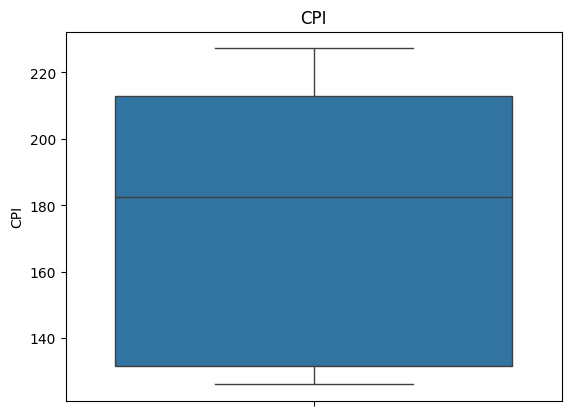

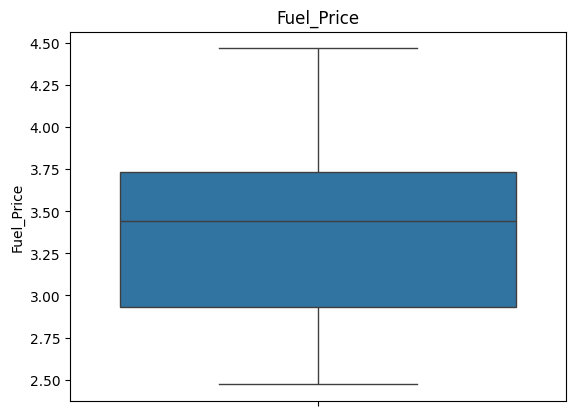

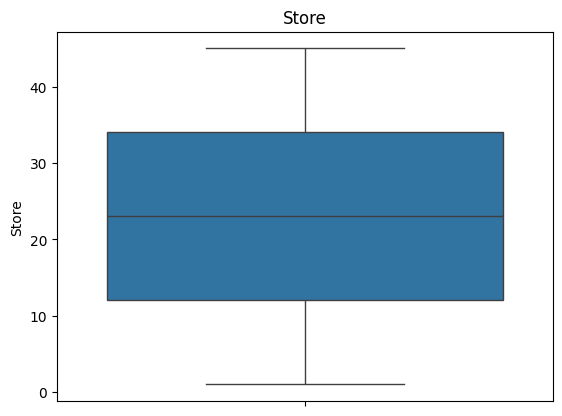

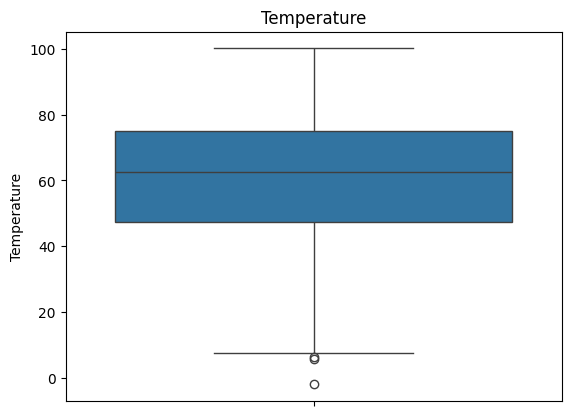

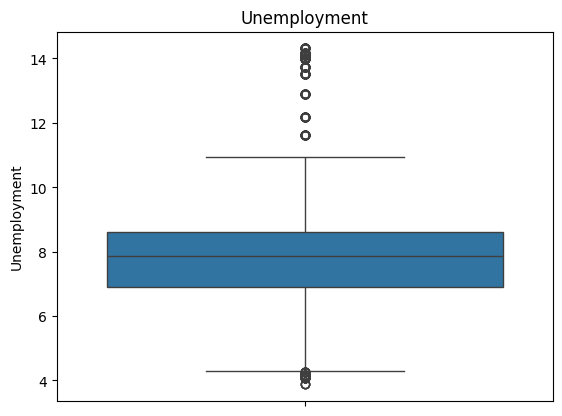

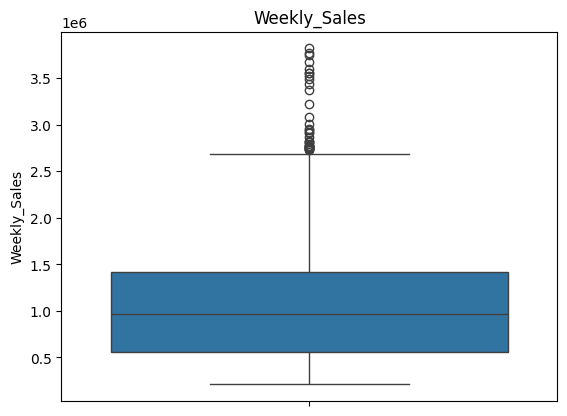

In [ ]:
for col in num_columns:
  sns.boxplot(df[col])
  plt.title(col)
  plt.show()

In [ ]:
col_outliers=["Weekly_Sales","Unemployment"]

In [ ]:
for i in col_outliers:
  Q1=df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)
  IQR=Q3-Q1
  df=df[(df[i]>=Q1-1.5*IQR)&(df[i]<=Q3+1.5*IQR)]

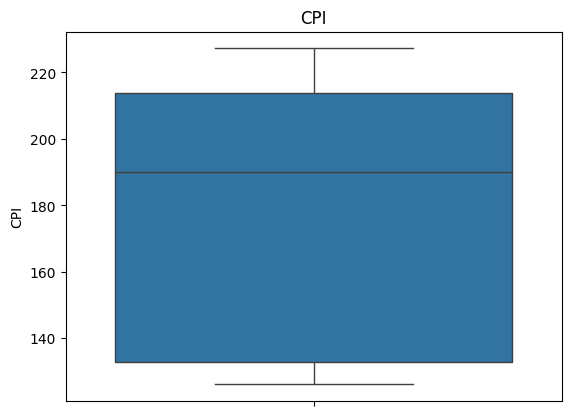

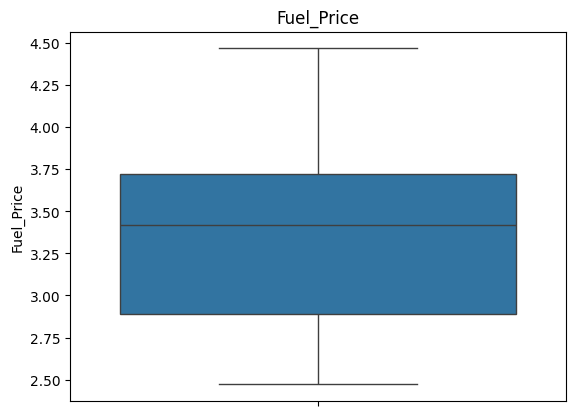

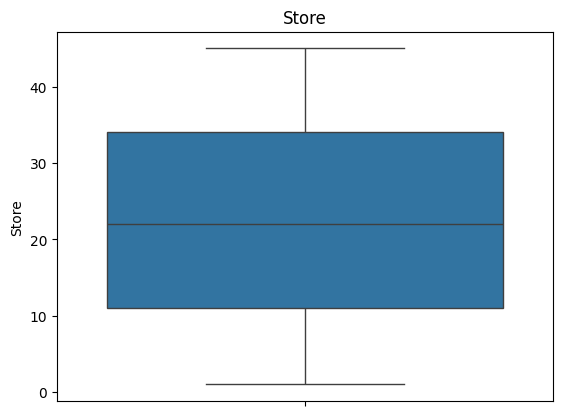

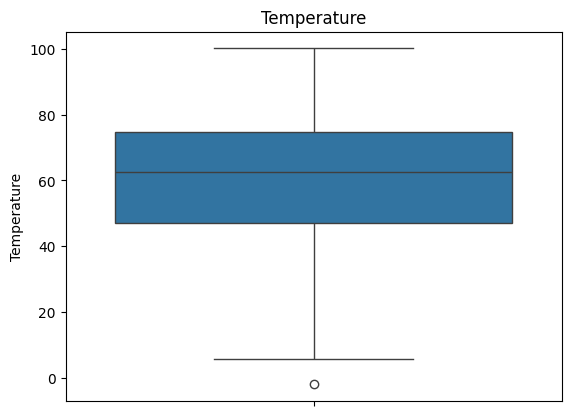

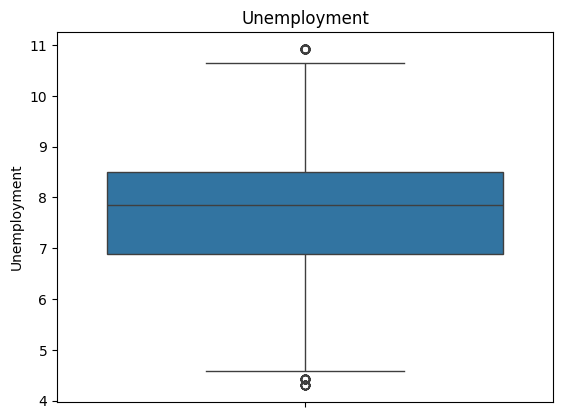

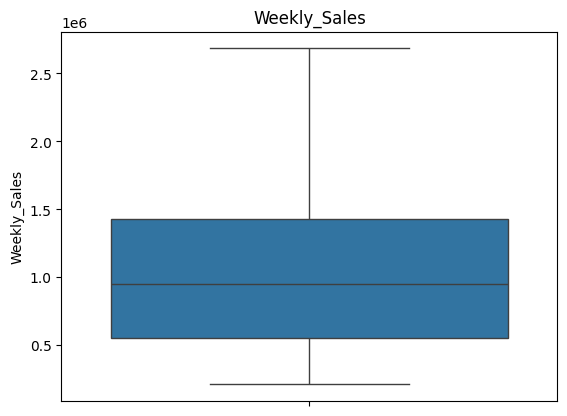

In [ ]:
for col in num_columns:
  sns.boxplot(df[col])
  plt.title(col)
  plt.show()

# Step 4.Exploratory Data Analysis (EDA):


*   Explored relationships between variables such as Weekly Sales, Temperature, CPI, and others.



Now we are exploring the data by Indipendent variables with the target variable which is Weekly sales

Store V/s Weekly Sales

In [ ]:
df_store_sales = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

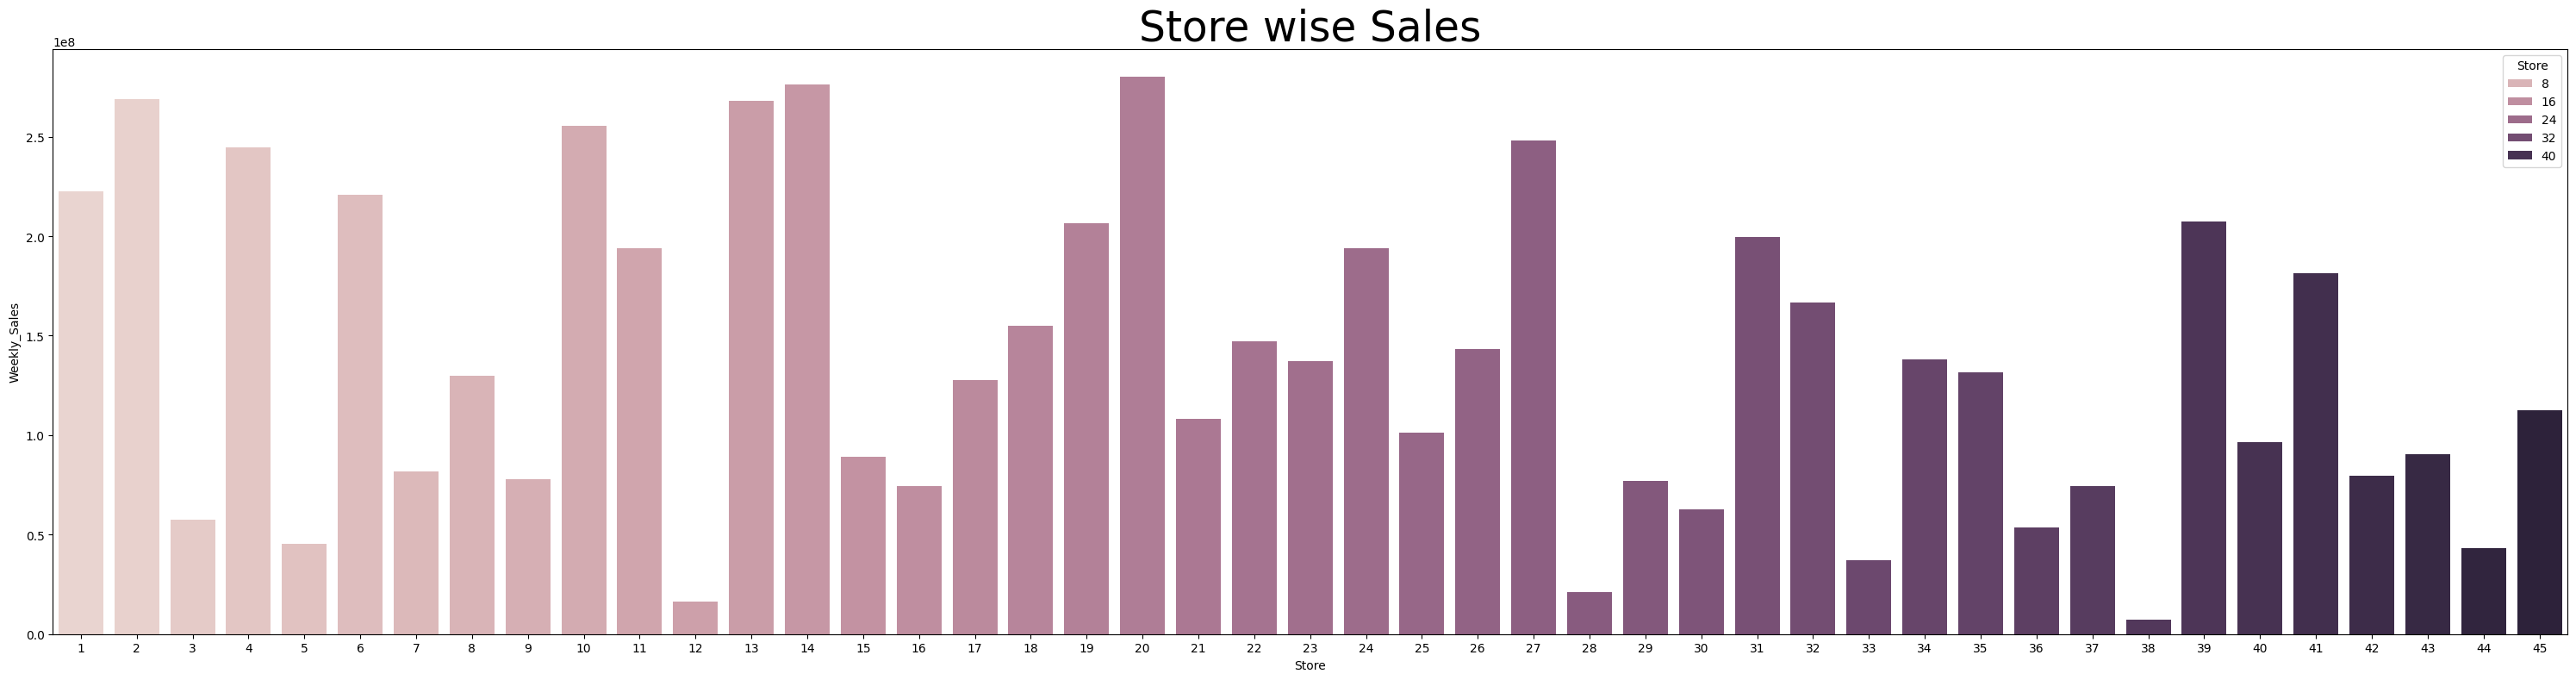

In [ ]:
plt.figure(figsize=(30,8))
sns.barplot(x='Store',y='Weekly_Sales',hue = 'Store',data=df_store_sales)
plt.title('Store wise Sales',fontsize=35)
#plt.xlabel('Store',fontsize=25)
#plt.ylabel('Weekly_Sales',fontsize=25)
plt.tight_layout()
plt.show()

In [ ]:
# Creating the dataframe which is having top 10 stores that can have highest weekly sales
top_10_Sale_Store = df_store_sales.sort_values(by='Weekly_Sales',ascending=False).head(10)
# Looking the dataframe
top_10_Sale_Store

,Store,Weekly_Sales
19,20,2.800237e+08
13,14,2.761276e+08
1,2,2.687221e+08
12,13,2.682025e+08
9,10,2.556789e+08
26,27,2.480387e+08
3,4,2.446487e+08
0,1,2.224028e+08
5,6,2.210286e+08
38,39,2.074455e+08


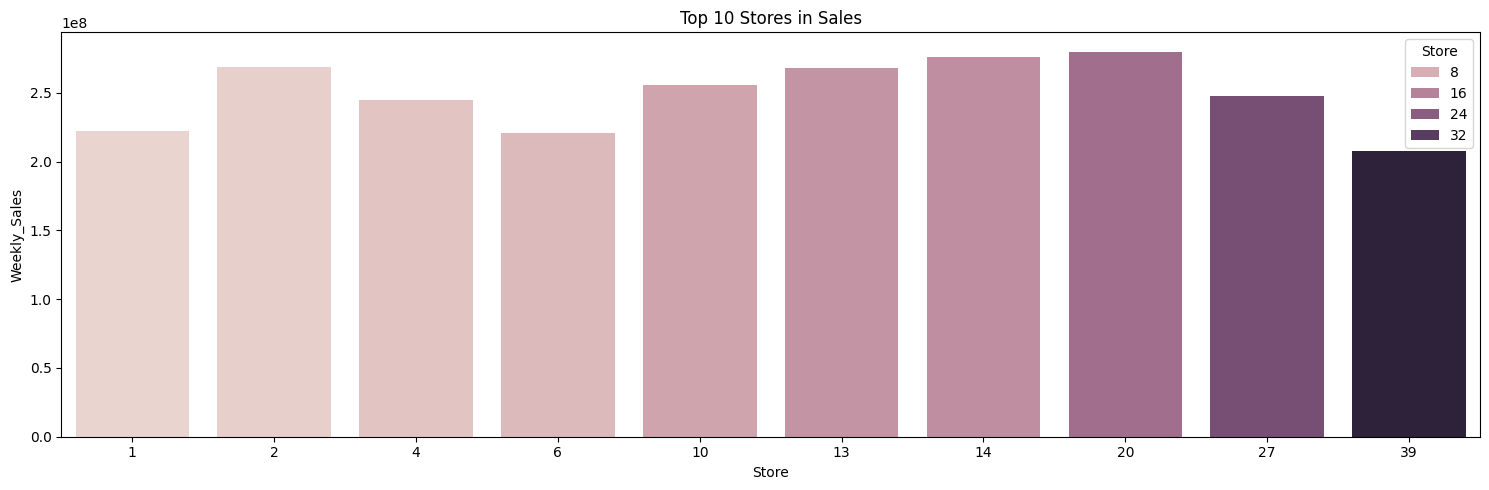

In [ ]:
# plotting the top 10 stores
plt.figure(figsize=(15,5)) # setting the frame to plot the store sales
sns.barplot(x='Store',y='Weekly_Sales',hue ='Store',data=top_10_Sale_Store) # creating the barplot
plt.title('Top 10 Stores in Sales') # putting title
plt.xlabel('Store') # assigening the X label as "Store"
plt.ylabel('Weekly_Sales') # assigening the Y label as "Weekly Sales"
plt.tight_layout() # this can help the barplot to set correctly in the frame
plt.show() # showing the plot

In [ ]:
# Creating the dataframe which is having Bottom 10 stores that can have Lowest  weekly sales
Bottom_10_Sale_Store = df_store_sales.sort_values(by='Weekly_Sales',ascending=True).head(10)
Bottom_10_Sale_Store # Lokking at the data

,Store,Weekly_Sales
37,38,7347378.89
11,12,16386710.79
27,28,21106767.80
32,33,37160221.96
43,44,43293087.84
4,5,45475688.90
35,36,53412214.97
2,3,57586735.07
29,30,62716885.12
36,37,74202740.32


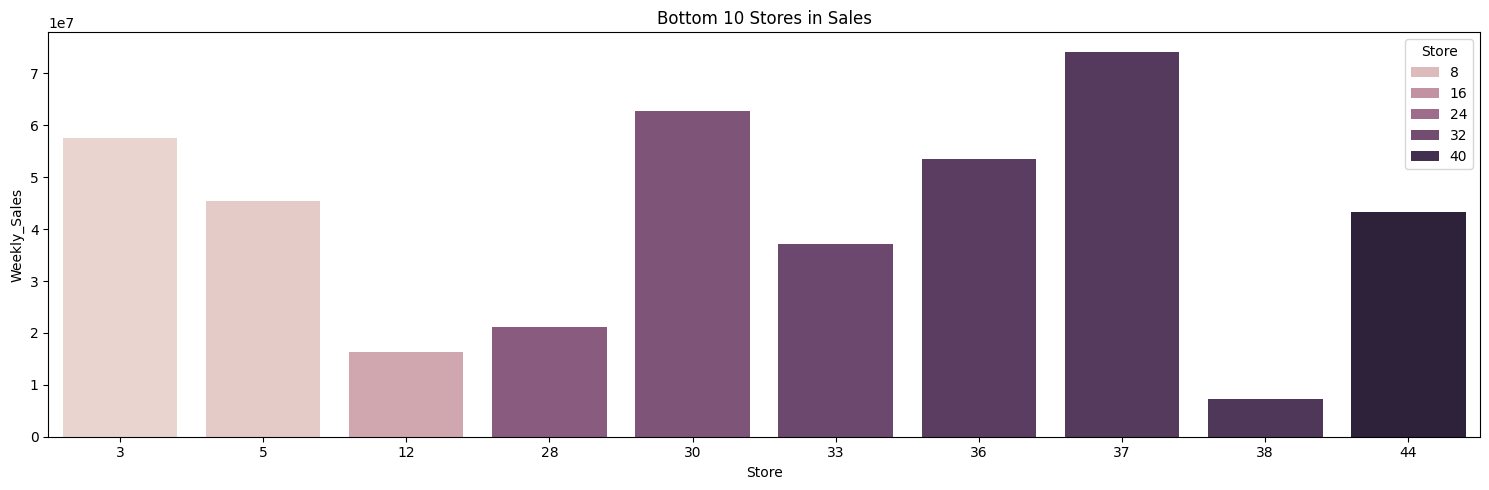

In [ ]:
# plotting the Bottom 10 stores
plt.figure(figsize=(15,5)) # setting the frame to plot the store sales
sns.barplot(x='Store',y='Weekly_Sales',hue ='Store',data=Bottom_10_Sale_Store) # creating the barplot
plt.title('Bottom 10 Stores in Sales') # Set the titles
plt.xlabel('Store') # asigening the 'X' label as "Store"
plt.ylabel('Weekly_Sales') # asigening the 'Y' label as "Weekly sales"
plt.tight_layout() # this can help the barplot to set correctly in the frame
plt.show() # Showing the plots

**Date V/s Weekly Sales**


In [ ]:
df.head() # Looking at the data


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,NaT,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,NaT,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
# Converting the data type of the date column to date time format from "object" Type
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
# Creating the dataframe by grouping the date and summing all the weekly sales for the particular 'Date'
df_date_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
df_date_sales=df_date_sales.sort_values(by='Date',ascending=True) # Sorting the values in the dataframe to ascending
df_date_sales.head(5) # Looking at first five data points

,Date,Weekly_Sales
0,2010-01-10,39825602.62
1,2010-02-04,47601520.01
2,2010-02-07,46204385.56
3,2010-03-09,44217991.80
4,2010-03-12,47039653.06


Text(0, 0.5, 'Sales')

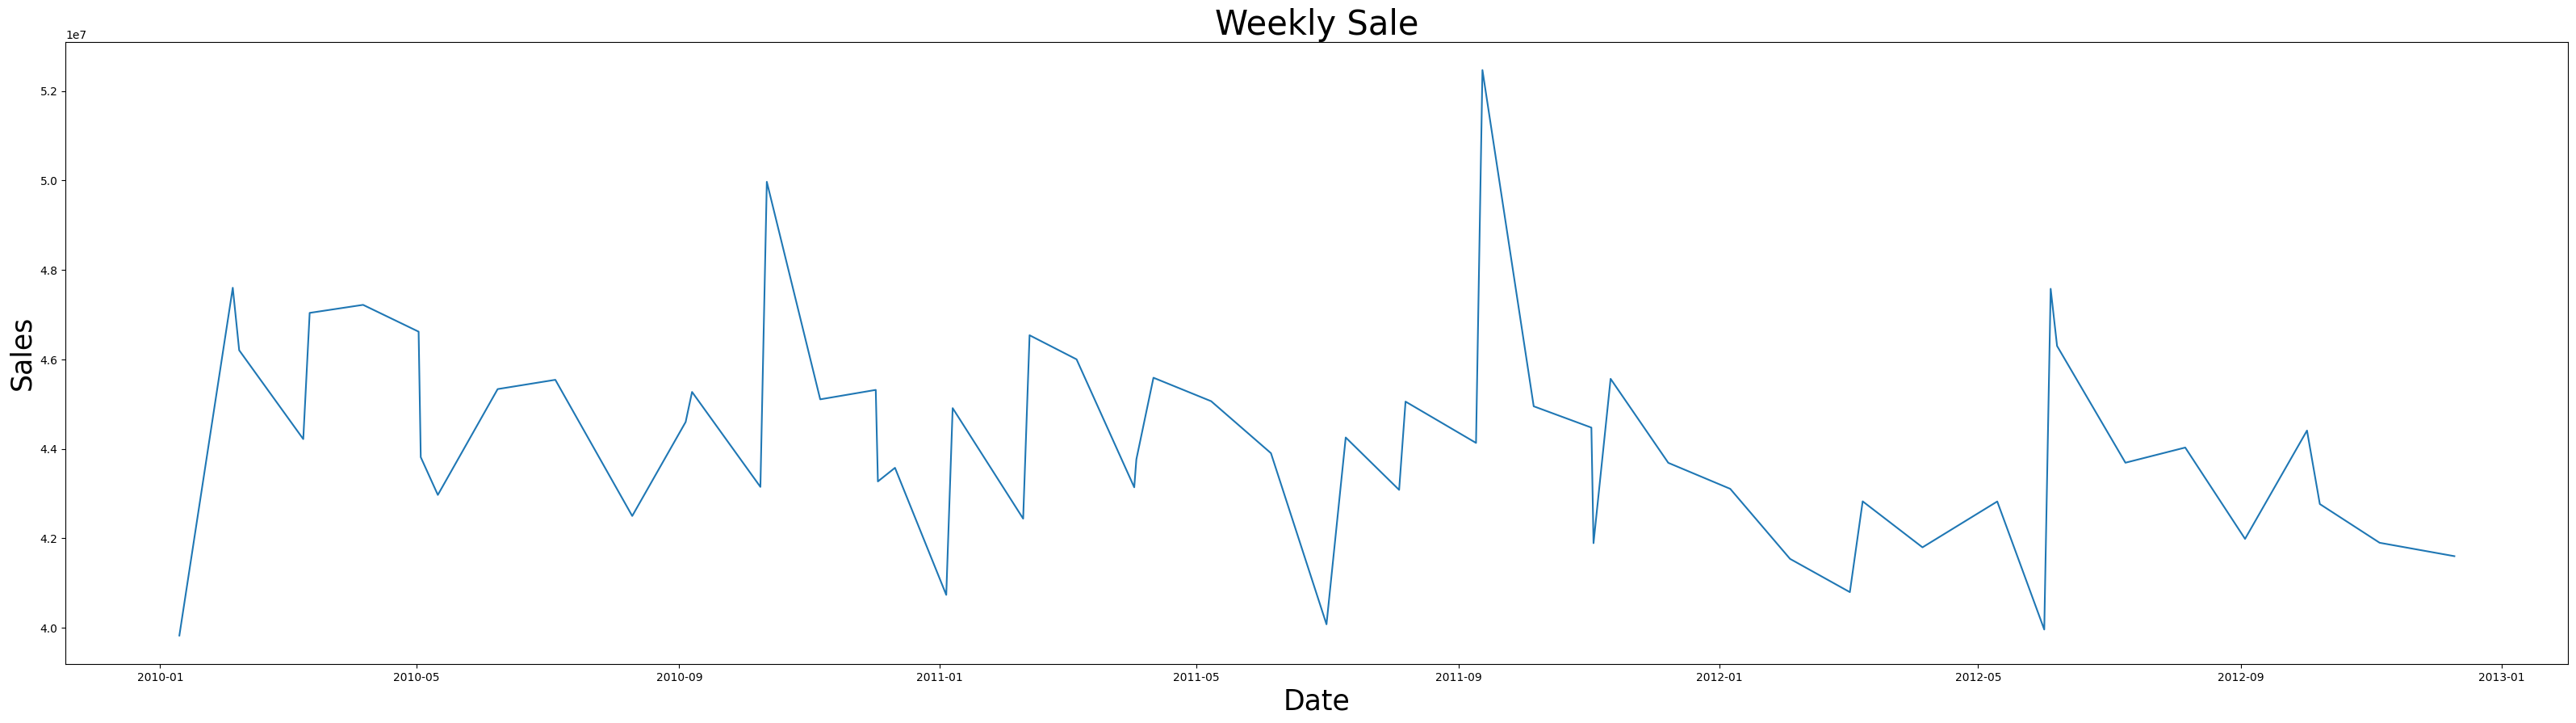

In [ ]:
# Plotting the line chart for checking the trend of weekly sales
plt.figure(figsize=(40,10)) # Setting the size for plot
sns.lineplot(x='Date',y='Weekly_Sales',data=df_date_sales) # line plot
plt.title('Weekly Sale',fontsize=30) # setting titile
plt.xlabel('Date',fontsize=25) # xLabel as Date
plt.ylabel('Sales',fontsize=25) # Ylabel as Sales

**Comment:**
Weekly Sales most of weeks are consolidating expect some quarters
We will See what quarters they are

In [ ]:
# Categorizing the sales into quarters
df['Quarters'] = df['Date'].dt.to_period("Q")

In [ ]:
# creating a new dataframe by grouping the quarters with summation of the weekly sales
df_quarter_sales = df.groupby('Quarters')['Weekly_Sales'].sum().reset_index()

In [ ]:
df_quarter_sales # Looking at the data


,Quarters,Weekly_Sales
0,2010Q1,2.248892e+08
1,2010Q2,2.259584e+08
2,2010Q3,1.779142e+08
3,2010Q4,2.703905e+08
4,2011Q1,2.206243e+08
5,2011Q2,2.214639e+08
6,2011Q3,2.690701e+08
7,2011Q4,2.205692e+08
8,2012Q1,1.682678e+08
9,2012Q2,2.184589e+08


<Axes: xlabel='Quarters', ylabel='Weekly_Sales'>

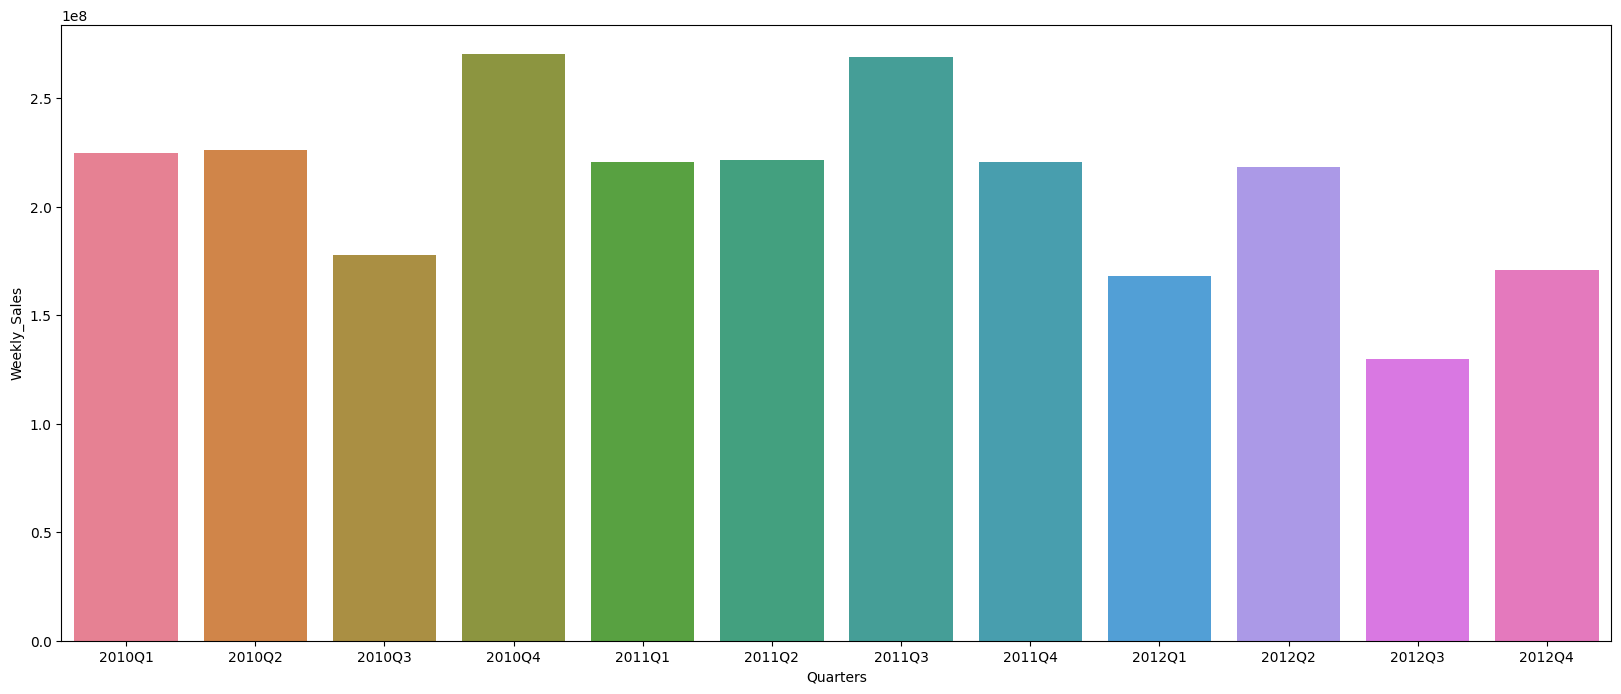

In [ ]:
# Plotting barplot to asses the quarter wise sales
plt.figure(figsize=(20,8))
sns.barplot(x='Quarters',y='Weekly_Sales',hue = 'Quarters',data=df_quarter_sales)

**Comment:**
In 2010 the Q1,Q2,Q4 Performed well

*   In 2011 also perofomnce is continued and Q3 is in peak sales
*   In 2011 also perofomnce is continued and Q3 is in peak sales
*   In 2012 the perofomnce got distrubed and Q2 Sales are high and Q3 is turned in very bad performance comparing all 3 years





**sales v/s Holidays**

In [ ]:
df['Holiday_Flag'].value_counts() # Checking the diffirent levels in Holiday column

,count
Holiday_Flag,
0,5511
1,409


In [ ]:
# Creating a new datafram that contains holiday and weekly sales summation
df_Hf_Sales = df.groupby('Holiday_Flag')['Weekly_Sales'].sum().reset_index()

In [ ]:
df_Hf_Sales# Checking The Df

,Holiday_Flag,Weekly_Sales
0,0,5.706791e+09
1,1,4.452825e+08


<Axes: xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

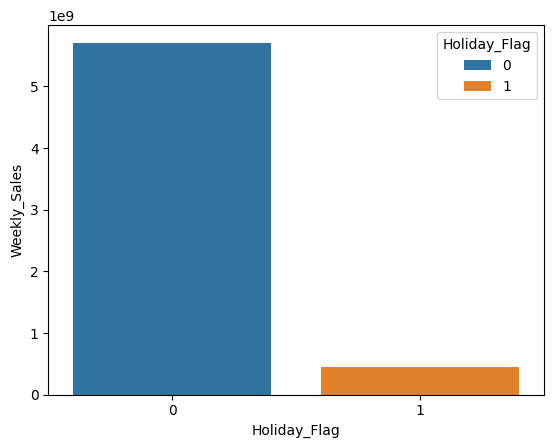

In [ ]:
sns.barplot(x='Holiday_Flag',y='Weekly_Sales',hue = 'Holiday_Flag',data=df_Hf_Sales) # Plotting the distribution


**Comment:**

*   The Sales are High In Normal Days, it is Quite common because of that holidays are always low compared to working days



**Temperature v/s sales**

In [ ]:
df['Temperature'].min() # finding the lower band of Tempeture

-2.06

In [ ]:
df['Temperature'].max() # finding the Upper band of Tempeture

100.14

In [ ]:
bins = [0,25,50,75,100] # Creating bins to sort the tempeture values
labels = ['0-25','26-50','51-75','76-100'] # Labe

In [ ]:
df['Temp_Category']= pd.cut(df['Temperature'],bins=bins,labels=labels) # Inserting the temp values into the new column

In [ ]:
df['Temp_Category'].value_counts() # Checking the diffirent columns in the temp category column

,count
Temp_Category,
51-75,2732
26-50,1528
76-100,1445
0-25,212


In [ ]:
# finding sales pattren during these temp levels
df_temp_sales = df.groupby('Temp_Category')['Weekly_Sales'].sum().reset_index()

<Axes: xlabel='Temp_Category', ylabel='Weekly_Sales'>

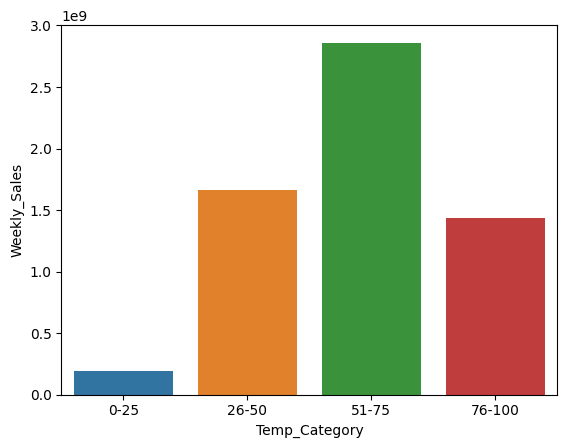

In [ ]:
# Plotting the weekly sales distribution on barplot
sns.barplot(x='Temp_Category',y='Weekly_Sales',hue = 'Temp_Category',data=df_temp_sales)

**Comment**


*   Stores perform well in moderate temp that is 26-50
*   Sales went peaks in Moderate to High temp that is 51-75
*   Sales went down in Very High and Low temp that is 0-25 & 76-100



**Fuel_Price V/s Sales**


In [ ]:
df['Fuel_Price'].min() # Checking the lower price band for fuel

2.472

In [ ]:
df['Fuel_Price'].max() # Checking the Upper price band for fuel

4.468

In [ ]:
bins1 = [2,2.5,3,3.5,4,4.5] # Creating bins and labels to categorize the fuel prices
labels1 = ['2-2.5','2.6-3','3.1-3.5','3.6-4','4.1-4.5']

In [ ]:
df['Fuel_Price_Cat']= pd.cut(df['Fuel_Price'],bins=bins1,labels=labels1) # creating new dataframe Fuel price category

In [ ]:
df['Fuel_Price_Cat'].value_counts() # Checking the different levels in the fuel price category

,count
Fuel_Price_Cat,
3.6-4,2406
2.6-3,1834
3.1-3.5,1364
4.1-4.5,315
2-2.5,1


In [ ]:
df_Fuel_Price_Sales = df.groupby('Fuel_Price_Cat')['Weekly_Sales'].sum().reset_index() # setting above values into pandas datframe

In [ ]:
df_Fuel_Price_Sales

,Fuel_Price_Cat,Weekly_Sales
0,2-2.5,4.702810e+05
1,2.6-3,1.896083e+09
2,3.1-3.5,1.420033e+09
3,3.6-4,2.500333e+09
4,4.1-4.5,3.351540e+08


<Axes: xlabel='Fuel_Price_Cat', ylabel='Weekly_Sales'>

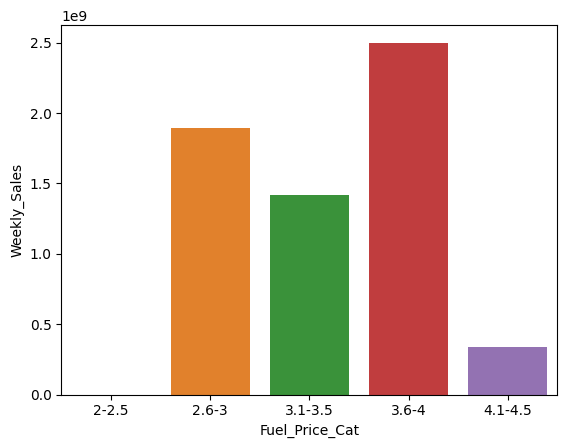

In [ ]:
sns.barplot(x='Fuel_Price_Cat',y='Weekly_Sales',hue='Fuel_Price_Cat',data=df_Fuel_Price_Sales)

**Comment:**



*   When the fuel prices are modereate the performance of stores are also moderatly high
*   But the fuel Price went above the modereate level that is 3.5, and the sales are also went very High.. May be the Inflation and fear of increasing prices people are bought more grocery to metigate with inflation
*   and when fuel price went even high the purchase power of people went down. may be the inflation and increasing in goods price


**CPI v/s Sales**


In [ ]:
df['CPI'].min() # Checking the lower band of inflation

126.064

In [ ]:
df['CPI'].max() # Checking the Upper band of inflation

227.2328068

In [ ]:
bins2=[125,155,185,215,245] # Creating bins and labels for categorization of inflation rate
labels2=['125-155','156-185','186-215','216-245',]

In [ ]:
df['CPI_cat']= pd.cut(df['CPI'],bins=bins2,labels=labels2) # Creating a new column called CPI Category

In [ ]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarters,Temp_Category,Fuel_Price_Cat,CPI_cat
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010Q2,26-50,2.6-3,186-215
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010Q4,26-50,2.6-3,186-215
2,1,NaT,1611968.17,0,39.93,2.514,211.289143,8.106,NaT,26-50,2.6-3,186-215
3,1,NaT,1409727.59,0,46.63,2.561,211.319643,8.106,NaT,26-50,2.6-3,186-215
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010Q2,26-50,2.6-3,186-215


In [ ]:
df['CPI_cat'].value_counts() # Checking diffirent levels in inflation

,count
CPI_cat,
125-155,2645
186-215,2000
216-245,1158
156-185,117


In [ ]:
df_Cpi_Sales = df.groupby('CPI_cat')['Weekly_Sales'].sum().reset_index() # new DF

In [ ]:
df_Cpi_Sales

,CPI_cat,Weekly_Sales
0,125-155,2.865460e+09
1,156-185,1.656582e+08
2,186-215,2.001602e+09
3,216-245,1.119353e+09


<Axes: xlabel='CPI_cat', ylabel='Weekly_Sales'>

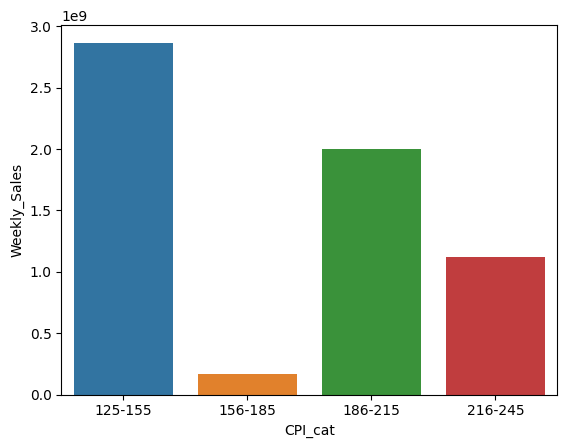

In [ ]:
sns.barplot(x='CPI_cat',y='Weekly_Sales',hue = 'CPI_cat',data=df_Cpi_Sales)

**Comment:**

*   when inflation is lower the performance of stores are high
*   in intial time of inflation the sale were drop signficantly
*   in third level when inflation is high the people may scared for future prices and bought more grocery for future needs also
*   eventually when the inflation went peaks the sales are went down



**Unemployment V/s Sales**

In [ ]:
df['Unemployment'].min() # Cheking the lower band of unemp rate

4.308

In [ ]:
df['Unemployment'].max() # Cheking the Upper band of unemp rate

10.926

In [ ]:
bins3=[4,6,8,10,12] # Creating the bins and labels to store the values
labels3=['4-6','6.1-8','8.1-10','10.1-12']

In [ ]:
df['Unemployment_Rate_Cat']= pd.cut(df['Unemployment'],bins=bins3,labels=labels3) # creating the new column in the dataframe

In [ ]:
df['Unemployment_Rate_Cat'].value_counts() #Checking the diffirent levels in the UnEmp Column

,count
Unemployment_Rate_Cat,
6.1-8,2774
8.1-10,2380
4-6,515
10.1-12,251


In [ ]:
df_Un_Emp_Sales = df.groupby('Unemployment_Rate_Cat')['Weekly_Sales'].sum().reset_index() # Creating separte dataframe for the sales and UnEmp rate

<Axes: xlabel='Unemployment_Rate_Cat', ylabel='Weekly_Sales'>

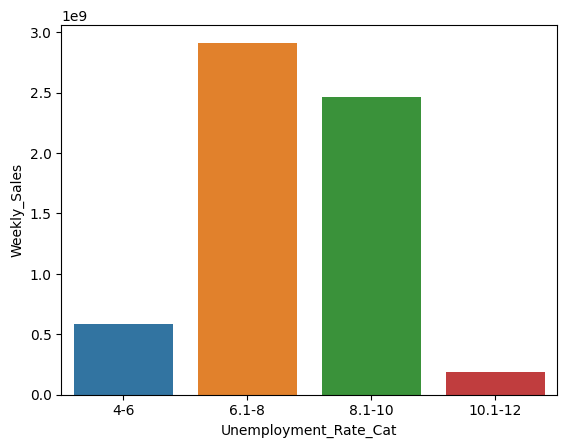

In [ ]:
sns.barplot(x='Unemployment_Rate_Cat',y='Weekly_Sales',hue = 'Unemployment_Rate_Cat',data=df_Un_Emp_Sales)

**Comment:**


*   When the Unemployment rate is between the 6 to 10 the stores are performing well
*   But whenever the Unemployment rate is increasing the sales went down



# Step 5. Correlation Analysis:

 *   Conducted correlation analysis to understand interrelations between variables using heatmaps.




In [ ]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

In [ ]:
# Creating a temperature category column
df_Encode = df[['Quarters','Temp_Category','Fuel_Price_Cat','CPI_cat','Unemployment_Rate_Cat']].copy()

In [ ]:
df_Encode['Quarters']=Le.fit_transform(df['Quarters'])
df_Encode['Temp_Category']=Le.fit_transform(df['Temp_Category'])
df_Encode['Fuel_Price_Cat']=Le.fit_transform(df['Fuel_Price_Cat'])
df_Encode['CPI_cat']=Le.fit_transform(df['CPI_cat'])
df_Encode['Unemployment_Rate_Cat']=Le.fit_transform(df['Unemployment_Rate_Cat'])
df_Encode['Weekly_Sales']=Le.fit_transform(df['Weekly_Sales'])

In [ ]:
corr_df = df_Encode.corr()

<Axes: >

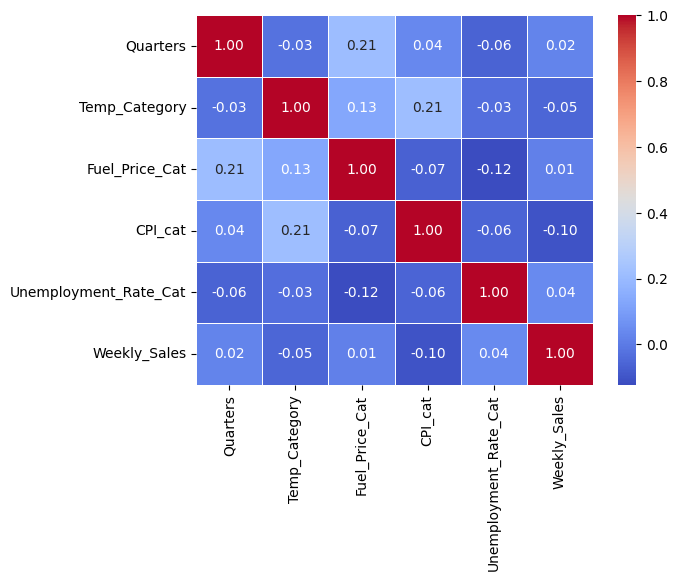

In [ ]:
sns.heatmap(corr_df,annot=True,cmap='coolwarm',fmt=".2f",linewidths=.5)

**Comment:**


*   Quarters and Fuel Price having high correlation
*   Because the fuel prices are also depend on the seasonal changes



# Step 6 . Part 1.Inferences from Questioner Part


*   a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?
*   b. If the weekly sales show a seasonal trend, when and what could be the reason?
*   c. Does temperature affect the weekly sales in any manner?
*   d. How is the Consumer Price index affecting the weekly sales of various stores?
*   e. Top performing stores according to the historical data.
*   f.The worst performing store, and how significant is the difference between the highest and lowest performing stores.




In [ ]:
df.head() # look at the data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


**a If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?**

Stores Most Affected by Unemployment:
    Store  Correlation
43     44    -0.780076
3       4    -0.633422
12     13    -0.400254
38     39    -0.384681
41     42    -0.356355


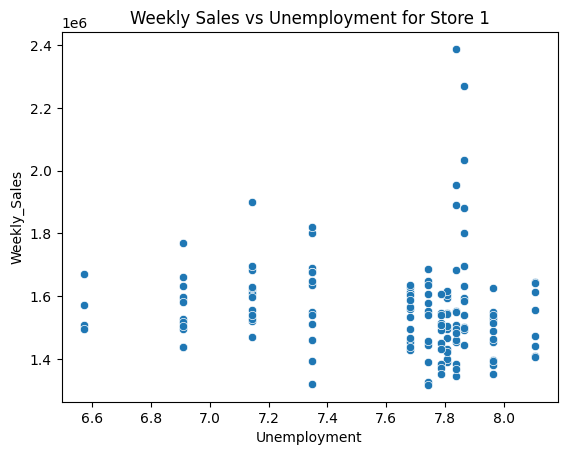

In [ ]:
# Correlation of Weekly Sales with Unemployment for Each Store
store_unemployment_corr = df.groupby('Store').apply( # Changed data_cleaned to df
    lambda x: x['Weekly_Sales'].corr(x['Unemployment'])
).reset_index(name='Correlation')

# Identify Stores Most Negatively Affected by Unemployment
most_affected_stores = store_unemployment_corr.sort_values(by='Correlation').head()
print("Stores Most Affected by Unemployment:")
print(most_affected_stores)

# Scatter Plot for a Random Store (e.g., Store 1)
store_1_data = df[df['Store'] == 1] # Changed data_cleaned to df
sns.scatterplot(data=store_1_data, x='Unemployment', y='Weekly_Sales')
plt.title("Weekly Sales vs Unemployment for Store 1")
plt.show()

**Answer for Question A:**

Yes, Weekly Sales appear to be affected by the unemployment rate. The correlation analysis reveals that higher unemployment generally correlates with lower sales, as people tend to spend less when they are unemployed.

**Stores Most Affected by Unemployment:**
The stores with the most negative correlation to unemployment (i.e., those suffering the most) are:


1.   Store 44 (correlation: -0.780)
2.   Store 4 (correlation: -0.633)
3.   Store 13 (correlation: -0.400)
4.   Store 39 (correlation: -0.385)
5.   Store 42 (correlation: -0.356)








**b. If the weekly sales show a seasonal trend, when and what could be the reason?**

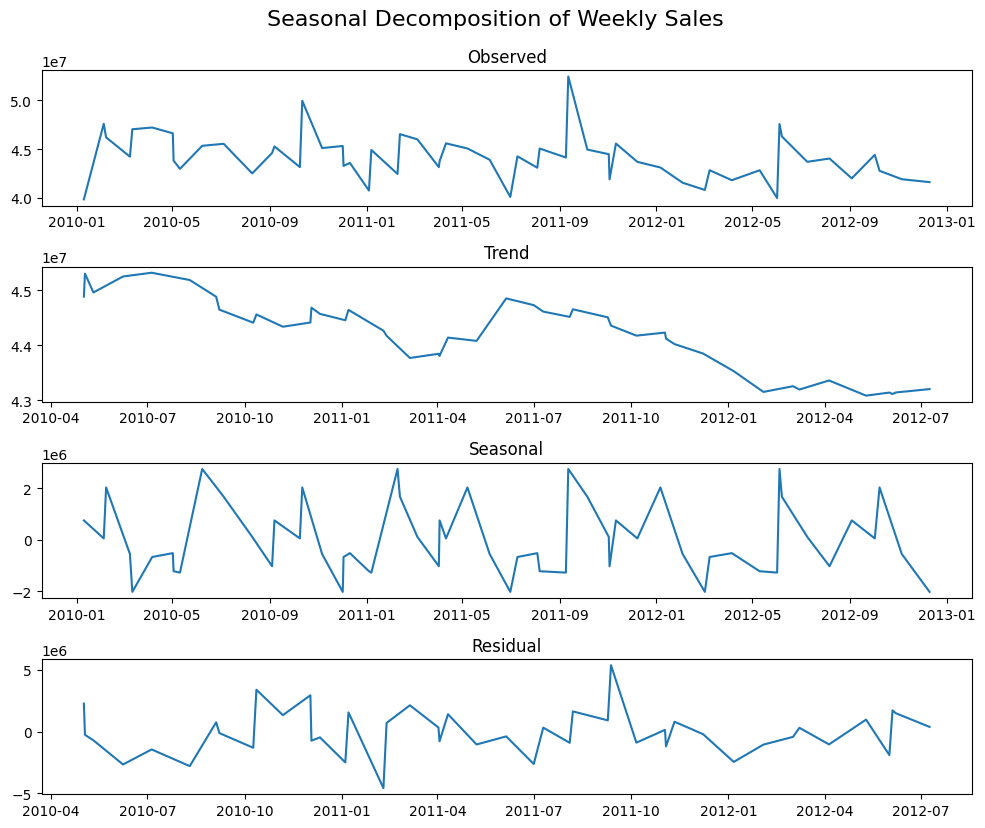

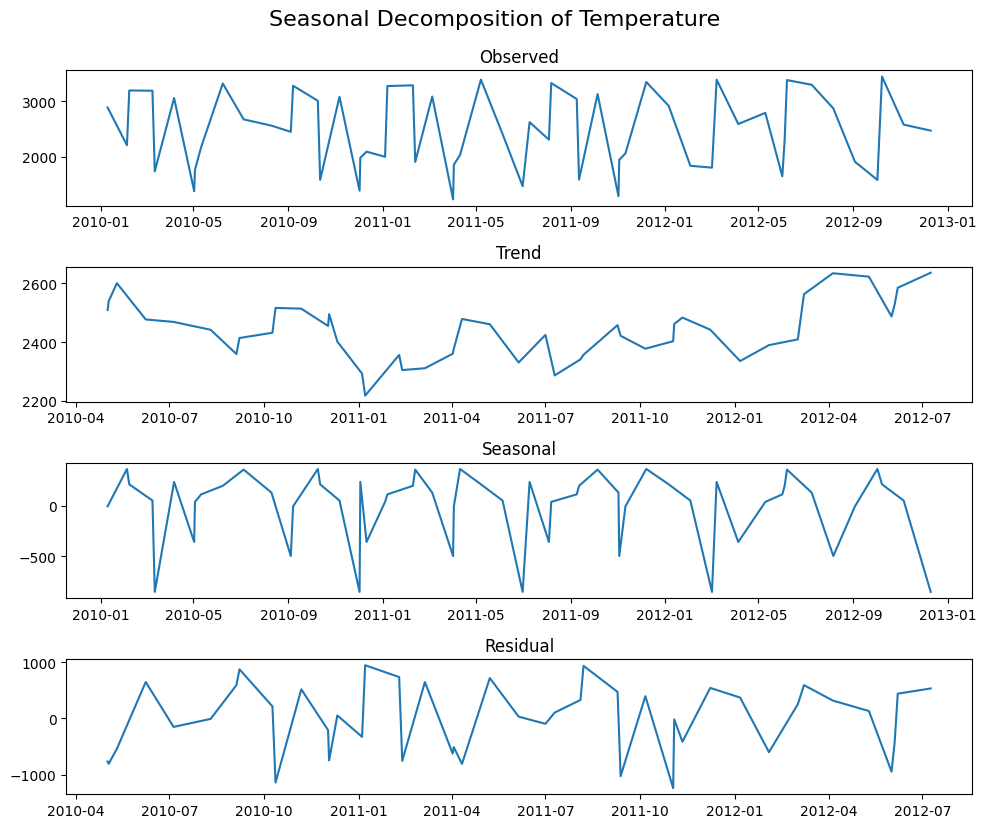

In [ ]:
# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Weekly Sales
df_stores_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
df_stores_sales.set_index('Date', inplace=True)  # Setting the Date column as an Index

# Decompose Weekly Sales
from statsmodels.tsa.seasonal import seasonal_decompose
sales_decomposition = seasonal_decompose(df_stores_sales['Weekly_Sales'], model='additive', period=13)

# Plotting the components of the decomposition
fig, axes = plt.subplots(4, 1, figsize=(10, 8))

# Observed
axes[0].plot(sales_decomposition.observed)
axes[0].set_title('Observed')

# Trend
axes[1].plot(sales_decomposition.trend)
axes[1].set_title('Trend')

# Seasonal
axes[2].plot(sales_decomposition.seasonal)
axes[2].set_title('Seasonal')

# Residual
axes[3].plot(sales_decomposition.resid)
axes[3].set_title('Residual')

# Adjust layout
plt.tight_layout()
plt.suptitle('Seasonal Decomposition of Weekly Sales', fontsize=16, y=1.03)
plt.show()

# Temperature
df_Temperature = df.groupby('Date')['Temperature'].sum().reset_index()
df_Temperature.set_index('Date', inplace=True)  # Setting the Date column as an Index

# Decompose Temperature
Temperature_decomposition = seasonal_decompose(df_Temperature['Temperature'], model='additive', period=13)

# Plotting the components of the temperature decomposition
fig, axes = plt.subplots(4, 1, figsize=(10, 8))

# Observed
axes[0].plot(Temperature_decomposition.observed)
axes[0].set_title('Observed')

# Trend
axes[1].plot(Temperature_decomposition.trend)
axes[1].set_title('Trend')

# Seasonal
axes[2].plot(Temperature_decomposition.seasonal)
axes[2].set_title('Seasonal')

# Residual
axes[3].plot(Temperature_decomposition.resid)
axes[3].set_title('Residual')

# Adjust layout
plt.tight_layout()
plt.suptitle('Seasonal Decomposition of Temperature', fontsize=16, y=1.03)
plt.show()


**Answer for Question B:**

***Temperature Data Interpretation:***

Temperature Trend: A seasonal downward trend is observed in the Temperature data starting from September 2010 until January 2011, which is consistent with colder months (autumn and winter). After January 2011, temperatures gradually increase until reaching a peak. However, from September 2011, temperatures start to decline again, following a similar seasonal pattern

***Weekly Sales Data Interpretation:***



*  Sales Trend: In the Weekly Sales data, a noticeable increase in sales starts from September 2010, aligning with the start of the holiday season and back-to-school shopping. The sales continue to increase until January 2011, possibly due to holiday shopping, post-holiday sales, and winter-related demand.
*   After January 2011, sales stabilize and transition to a downward trend, possibly due to the post-holiday lull, lower spending in the off-season, and fewer promotional events.

*   This pattern repeats in September 2011 to January 2012, showing
   similar trends in sales due to seasonal shopping habits.






This inverse relationship is evident during the period from September 2011 to January 2012, where colder temperatures coincide with a rise in sales, while warmer months (e.g., spring and summer) lead to a decline in sales.

**c. Does temperature affect the weekly sales in any manner?**

In [ ]:
df_temp_sales = df.groupby(['Date','Temperature'])['Weekly_Sales'].sum().reset_index()


In [ ]:
df_temp_sales_correlation =df_temp_sales.corr()


<Axes: >

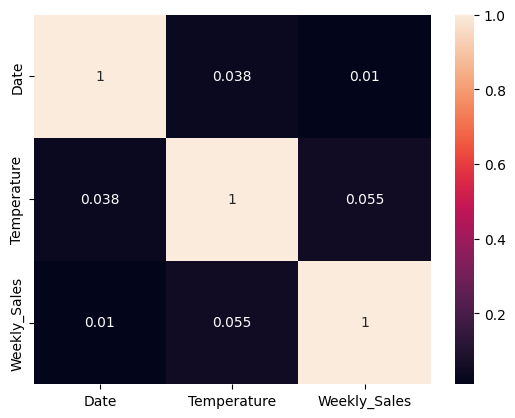

In [ ]:
sns.heatmap(df_temp_sales_correlation,annot=True)

**Answer for Question C:**
as we guess there is a nagatively correlation between the temperature and weekly sales
so the answer for qustion c: Yes there is a Nagative correlation and the Temperature is affecting the Weekly Sales

**d. How is the Consumer Price index affecting the weekly sales of various stores?**

In [ ]:
df_cpi_sales = df.groupby(['Date','CPI'])['Weekly_Sales'].sum().reset_index()

In [ ]:
df_cpi_sales_correlation =df_cpi_sales.corr()

<Axes: >

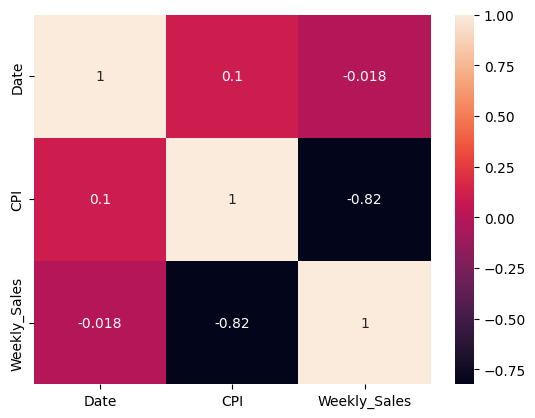

In [ ]:
sns.heatmap(df_cpi_sales_correlation,annot=True)

**Answer for Question D:**
there is a nagative correlation between the CPI and weekly sales
so the answer for qustion D: Yes there is a Nagative correlation and the CPI is affecting the Weekly Sales
we can see that in below graph as well. when the CPI increasing the sales are down

**e. Top-performing stores according to historical data**


Top 5 Performing Stores:
Store
20    2.800237e+08
14    2.761276e+08
2     2.687221e+08
13    2.682025e+08
10    2.556789e+08
Name: Weekly_Sales, dtype: float64


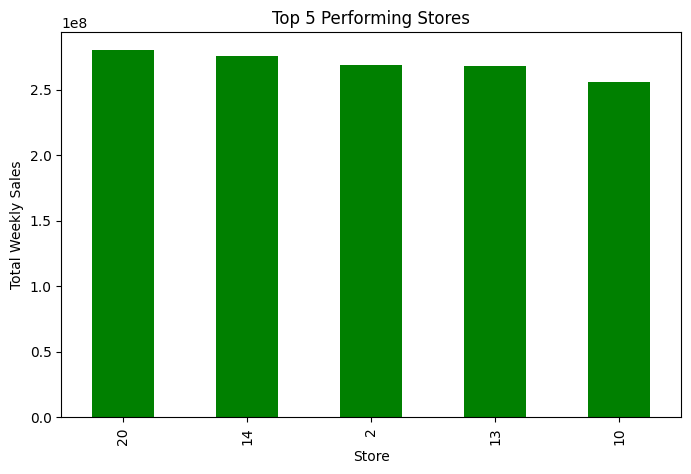

In [ ]:
# Total sales by store
store_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
print("Top 5 Performing Stores:")
print(store_sales.head(5))

# Bar plot for top 5 stores
store_sales.head(5).plot(kind='bar', figsize=(8, 5), color='green')
plt.title('Top 5 Performing Stores')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.show()

**f. Worst-performing store and difference between highest and lowest performing stores**

Worst Performing Store:
Store
38    7347378.89
Name: Weekly_Sales, dtype: float64

Difference between the highest and lowest performing stores: 272676355.92


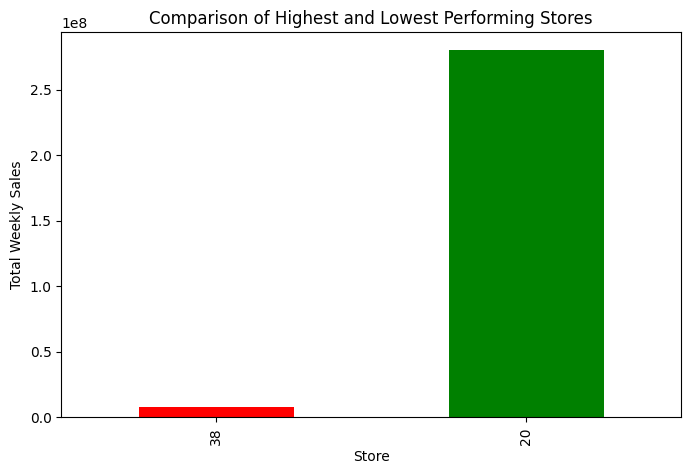

In [ ]:
# Lowest performing store
print("Worst Performing Store:")
print(store_sales.tail(1))

# Difference between highest and lowest performing stores
sales_difference = store_sales.max() - store_sales.min()
print(f"\nDifference between the highest and lowest performing stores: {sales_difference:.2f}")

# Bar plot for comparison
# Use pd.concat instead of append
pd.concat([store_sales.tail(1), store_sales.head(1)]).plot(kind='bar', figsize=(8, 5), color=['red', 'green'])
plt.title('Comparison of Highest and Lowest Performing Stores')
plt.xlabel('Store')
plt.ylabel('Total Weekly Sales')
plt.show()

#  Step 7. Use predictive modeling techniques to forecast the sales for any 5  store for the next 12 weeks

#7.a Store 1 Forecasting

In [ ]:
!pip install scikit-learn # Installing scikit-learn

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


Forecasted Sales for Store 1 for Next 12 Weeks:
                Forecast   Lower Bound   Upper Bound
Date                                                
2012-09-23  6.980391e+05 -2.399500e+06  3.795578e+06
2012-09-30  4.792237e+05 -2.691084e+06  3.649531e+06
2012-10-07  9.132521e+05 -2.260842e+06  4.087347e+06
2012-10-14  1.156161e+05 -3.110944e+06  3.342176e+06
2012-10-21  5.591856e+05 -2.675791e+06  3.794162e+06
2012-10-28  3.524552e+05 -2.923369e+06  3.628279e+06
2012-11-04  1.272836e+06 -2.015383e+06  4.561056e+06
2012-11-11  5.943983e+05 -2.727702e+06  3.916499e+06
2012-11-18  9.523775e+05 -2.385088e+06  4.289843e+06
2012-11-25  4.796438e+05 -2.887357e+06  3.846645e+06
2012-12-02  3.299508e+05 -3.054469e+06  3.714370e+06
2012-12-09  6.300362e+05 -2.781112e+06  4.041185e+06
Mean Absolute Error (MAE): 613781.18
Root Mean Squared Error (RMSE): 692386.58
Mean Absolute Percentage Error (MAPE): 4.93%


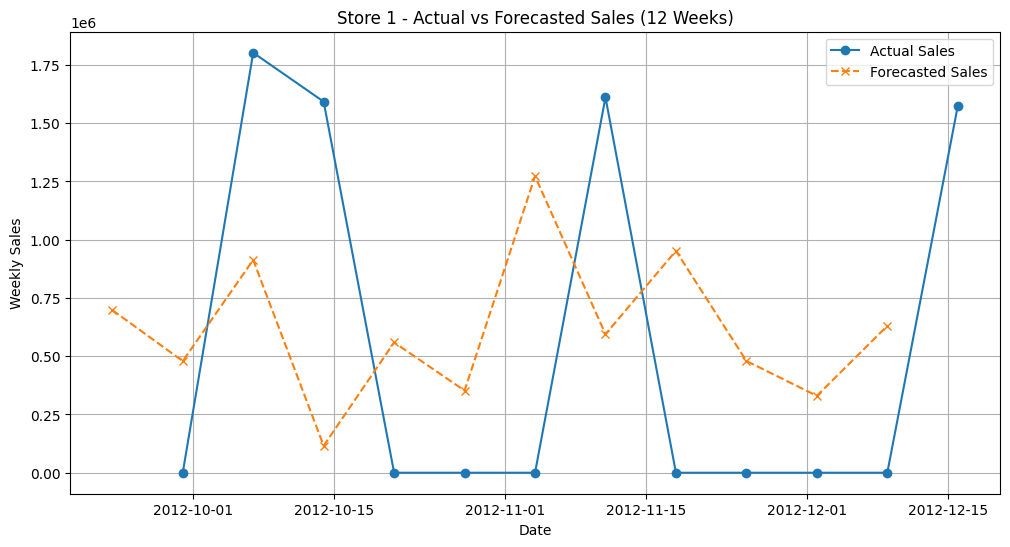

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Filter data for a specific store (e.g., Store 1)
store_id = 1
store_data_1 = df[df['Store'] == store_id]

# Set 'Date' as the index and resample weekly
store_data_1.set_index('Date', inplace=True)
store_data_1= store_data_1['Weekly_Sales'].resample('W').sum()

# Split data into training and testing sets
train_data = store_data_1[:-12]  # Exclude the last 12 weeks for training
test_data = store_data_1[-12:]  # Use the last 12 weeks for testing

# Define and fit the SARIMAX model
model = SARIMAX(train_data,
                order=(1, 1, 2),  # Experiment with (p, d, q)
                seasonal_order=(1, 1, 1, 12),  # Adjust seasonal (P, D, Q, s)
                enforce_stationarity=False,
                enforce_invertibility=False)
model_fit = model.fit(disp=False)

# Forecast for the next 12 weeks
forecast_1 = model_fit.get_forecast(steps=12)
forecast_values_1 = forecast_1.predicted_mean
forecast_conf_int = forecast_1.conf_int()

# Generate dates for the forecasted period
forecast_dates = pd.date_range(start=train_data.index[-1], periods=12, freq='W')

# Combine forecast and confidence intervals into a DataFrame
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast': forecast_values_1.values,
    'Lower Bound': forecast_conf_int.iloc[:, 0].values,
    'Upper Bound': forecast_conf_int.iloc[:, 1].values
})
forecast_df.set_index('Date', inplace=True)

# Print forecasted sales
print(f"Forecasted Sales for Store {store_id} for Next 12 Weeks:")
print(forecast_df)

# Calculate error metrics
mae = mean_absolute_error(test_data, forecast_values_1)
rmse = np.sqrt(mean_squared_error(test_data, forecast_values_1))


# Recalculate MAPE (avoid zero values)
epsilon = 1e-6
non_zero_actuals = test_data[test_data > epsilon]
aligned_forecast = forecast_values_1.loc[non_zero_actuals.index]
mape = np.mean(np.abs((non_zero_actuals - aligned_forecast) / non_zero_actuals)) * 10

# Print error metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Plot actual vs forecasted sales
plt.figure(figsize=(12, 6))
plt.plot(test_data, label='Actual Sales', marker='o')
plt.plot(forecast_dates, forecast_values_1, label='Forecasted Sales', linestyle='--', marker='x')
plt.title(f"Store {store_id} - Actual vs Forecasted Sales (12 Weeks)")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.grid(True)
plt.show()


# 7.b  Store 11 Forecasting

Forecasted Sales for Store 11 for Next 12 Weeks:
                Forecast   Lower Bound   Upper Bound
Date                                                
2012-09-23  2.855230e+05 -2.351871e+06  2.922917e+06
2012-09-30  7.820538e+05 -1.964936e+06  3.529043e+06
2012-10-07  7.430025e+05 -2.013759e+06  3.499764e+06
2012-10-14 -5.353918e+04 -2.810331e+06  2.703252e+06
2012-10-21 -3.467072e+05 -3.106313e+06  2.412899e+06
2012-10-28  2.485461e+05 -2.516642e+06  3.013734e+06
2012-11-04  1.141710e+06 -1.630621e+06  3.914040e+06
2012-11-11  2.485113e+05 -2.531725e+06  3.028747e+06
2012-11-18 -3.501495e+05 -3.138637e+06  2.438338e+06
2012-11-25  2.795790e+05 -2.517306e+06  3.076464e+06
2012-12-02  1.067758e+05 -2.698560e+06  2.912112e+06
2012-12-09  4.768643e+05 -2.336933e+06  3.290661e+06
Mean Absolute Error (MAE): 362589.53
Root Mean Squared Error (RMSE): 438530.50
Mean Absolute Percentage Error (MAPE): 4.32%


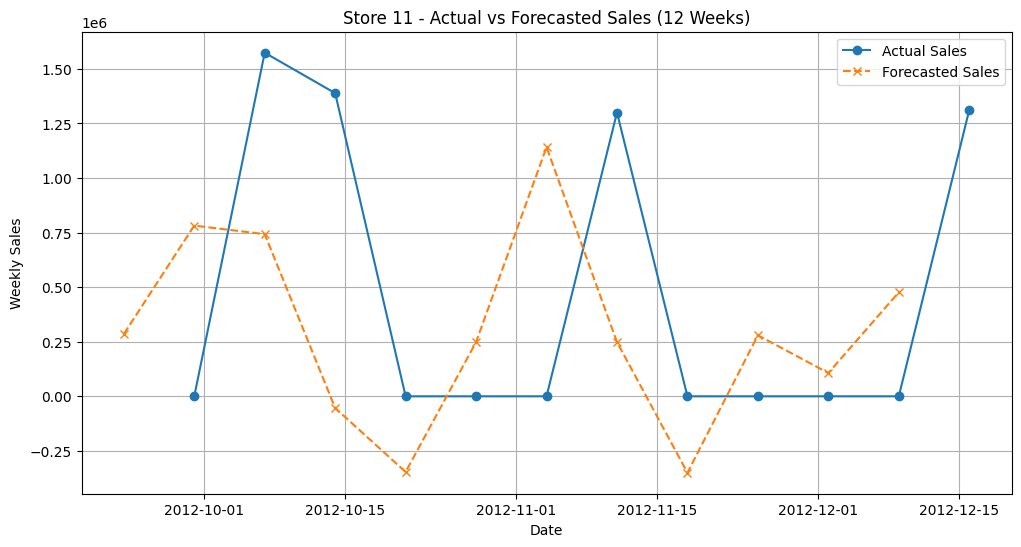

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Filter data for a specific store
store_id = 11
store_data_11 = df[df['Store'] == store_id]

# Set 'Date' as the index and resample weekly
store_data_11.set_index('Date', inplace=True)
store_data_11 = store_data_11['Weekly_Sales'].resample('W').sum()

# Split data into training and testing sets
train_data = store_data_11[:-12]  # Exclude the last 12 weeks for training
test_data = store_data_11[-12:]  # Use the last 12 weeks for testing

# Define and fit the SARIMAX model
model = SARIMAX(train_data,
                order=(1, 1, 2),  # Experiment with (p, d, q)
                seasonal_order=(2, 1, 1, 12),  # Adjust seasonal (P, D, Q, s)
                enforce_stationarity=False,
                enforce_invertibility=False)
model_fit = model.fit(disp=False)

# Forecast for the next 12 weeks
forecast_11 = model_fit.get_forecast(steps=12)
forecast_values_11 = forecast_11.predicted_mean
forecast_conf_int = forecast_11.conf_int()

# Generate dates for the forecasted period
forecast_dates = pd.date_range(start=train_data.index[-1], periods=12, freq='W')

# Combine forecast and confidence intervals into a DataFrame
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast': forecast_values_11.values,
    'Lower Bound': forecast_conf_int.iloc[:, 0].values,
    'Upper Bound': forecast_conf_int.iloc[:, 1].values
})
forecast_df.set_index('Date', inplace=True)

# Print forecasted sales
print(f"Forecasted Sales for Store {store_id} for Next 12 Weeks:")
print(forecast_df)

# Calculate error metrics
mae = mean_absolute_error(test_data, forecast_values_11)
rmse = np.sqrt(mean_squared_error(test_data, forecast_values_11))


# Recalculate MAPE (avoid zero values)
epsilon = 1e-6
non_zero_actuals = test_data[test_data > epsilon]
aligned_forecast = forecast_values_11.loc[non_zero_actuals.index]
mape = np.mean(np.abs((non_zero_actuals - aligned_forecast) / non_zero_actuals)) * 10

# Print error metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Plot actual vs forecasted sales
plt.figure(figsize=(12, 6))
plt.plot(test_data, label='Actual Sales', marker='o')
plt.plot(forecast_dates, forecast_values_11, label='Forecasted Sales', linestyle='--', marker='x')
plt.title(f"Store {store_id} - Actual vs Forecasted Sales (12 Weeks)")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.grid(True)
plt.show()


# 7.c  Store 22 Forecasting

Forecasted Sales for Store 22 for Next 12 Weeks:
                 Forecast   Lower Bound   Upper Bound
Date                                                 
2012-09-23  180784.283517 -1.793117e+06  2.154685e+06
2012-09-30  528543.548505 -1.531685e+06  2.588772e+06
2012-10-07  503761.906195 -1.561689e+06  2.569213e+06
2012-10-14  -58244.078485 -2.124164e+06  2.007676e+06
2012-10-21 -275399.714322 -2.345170e+06  1.794370e+06
2012-10-28  166581.711637 -1.909482e+06  2.242645e+06
2012-11-04  819367.222558 -1.264207e+06  2.902941e+06
2012-11-11  146451.031982 -1.945170e+06  2.238072e+06
2012-11-18 -280036.987476 -2.379922e+06  1.819848e+06
2012-11-25  184921.460421 -1.923303e+06  2.293146e+06
2012-12-02   70235.509530 -2.046342e+06  2.186813e+06
2012-12-09  325825.318633 -1.799092e+06  2.450742e+06
Mean Absolute Error (MAE): 266277.18
Root Mean Squared Error (RMSE): 322411.78
Mean Absolute Percentage Error (MAPE): 4.57%


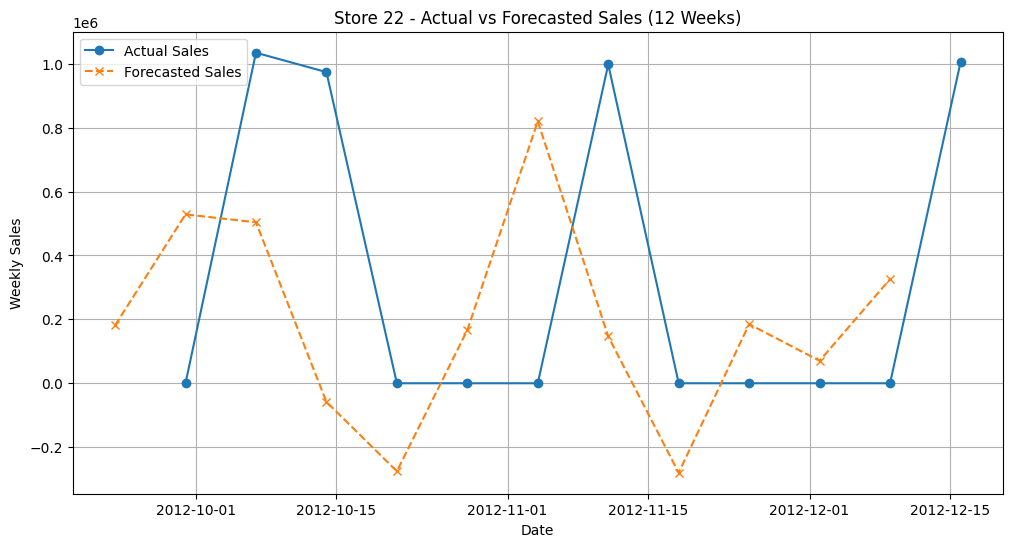

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Filter data for a specific store
store_id = 22
store_data_22 = df[df['Store'] == store_id]

# Set 'Date' as the index and resample weekly
store_data_22.set_index('Date', inplace=True)
store_data_22 = store_data_22['Weekly_Sales'].resample('W').sum()

# Split data into training and testing sets
train_data = store_data_22[:-12]  # Exclude the last 12 weeks for training
test_data = store_data_22[-12:]  # Use the last 12 weeks for testing

# Define and fit the SARIMAX model
model = SARIMAX(train_data,
                order=(1, 1, 2),  # Experiment with (p, d, q)
                seasonal_order=(2, 1, 1, 12),  # Adjust seasonal (P, D, Q, s)
                enforce_stationarity=False,
                enforce_invertibility=False)
model_fit = model.fit(disp=False)

# Forecast for the next 12 weeks
forecast_22 = model_fit.get_forecast(steps=12)
forecast_values_22 = forecast_22.predicted_mean
forecast_conf_int = forecast_22.conf_int()

# Generate dates for the forecasted period
forecast_dates = pd.date_range(start=train_data.index[-1], periods=12, freq='W')

# Combine forecast and confidence intervals into a DataFrame
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast': forecast_values_22.values,
    'Lower Bound': forecast_conf_int.iloc[:, 0].values,
    'Upper Bound': forecast_conf_int.iloc[:, 1].values
})
forecast_df.set_index('Date', inplace=True)

# Print forecasted sales
print(f"Forecasted Sales for Store {store_id} for Next 12 Weeks:")
print(forecast_df)

# Calculate error metrics
mae = mean_absolute_error(test_data, forecast_values_22)
rmse = np.sqrt(mean_squared_error(test_data, forecast_values_22))


# Recalculate MAPE (avoid zero values)
epsilon = 1e-6
non_zero_actuals = test_data[test_data > epsilon]
aligned_forecast = forecast_values_22.loc[non_zero_actuals.index]
mape = np.mean(np.abs((non_zero_actuals - aligned_forecast) / non_zero_actuals)) * 10

# Print error metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Plot actual vs forecasted sales
plt.figure(figsize=(12, 6))
plt.plot(test_data, label='Actual Sales', marker='o')
plt.plot(forecast_dates, forecast_values_22, label='Forecasted Sales', linestyle='--', marker='x')
plt.title(f"Store {store_id} - Actual vs Forecasted Sales (12 Weeks)")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.grid(True)
plt.show()


# 7.d  Store 32 Forecasting

Forecasted Sales for Store 32 for Next 12 Weeks:
                 Forecast   Lower Bound   Upper Bound
Date                                                 
2012-09-23  187643.522897 -1.990023e+06  2.365310e+06
2012-09-30  609939.421896 -1.632017e+06  2.851896e+06
2012-10-07  603445.457559 -1.703864e+06  2.910755e+06
2012-10-14  -20039.030161 -2.330562e+06  2.290484e+06
2012-10-21 -225365.452775 -2.559490e+06  2.108759e+06
2012-10-28  232208.751602 -2.113291e+06  2.577708e+06
2012-11-04  958485.707202 -1.391671e+06  3.308643e+06
2012-11-11  251441.395684 -2.103316e+06  2.606199e+06
2012-11-18 -166437.503854 -2.527136e+06  2.194261e+06
2012-11-25  251559.461685 -2.115531e+06  2.618649e+06
2012-12-02  102410.429022 -2.270835e+06  2.475656e+06
2012-12-09  417961.738806 -1.961242e+06  2.797166e+06
Mean Absolute Error (MAE): 297324.81
Root Mean Squared Error (RMSE): 364255.25
Mean Absolute Percentage Error (MAPE): 4.51%


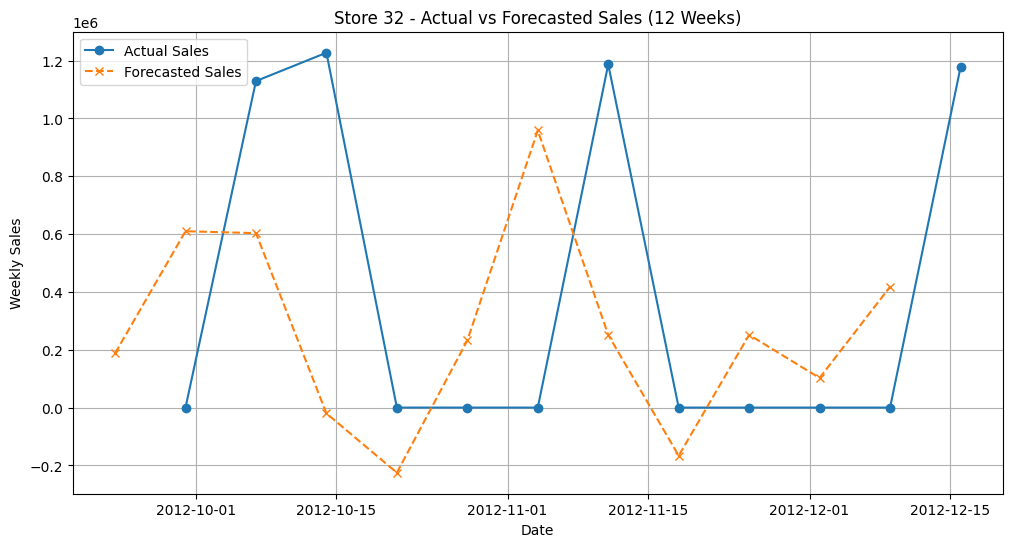

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Filter data for a specific store
store_id = 32
store_data_32 = df[df['Store'] == store_id]

# Set 'Date' as the index and resample weekly
store_data_32.set_index('Date', inplace=True)
store_data_32 = store_data_32['Weekly_Sales'].resample('W').sum()

# Split data into training and testing sets
train_data = store_data_32[:-12]  # Exclude the last 12 weeks for training
test_data = store_data_32[-12:]  # Use the last 12 weeks for testing

# Define and fit the SARIMAX model
model = SARIMAX(train_data,
                order=(2, 1, 2),  # Experiment with (p, d, q)
                seasonal_order=(2, 1, 1, 12),  # Adjust seasonal (P, D, Q, s)
                enforce_stationarity=False,
                enforce_invertibility=False)
model_fit = model.fit(disp=False)

# Forecast for the next 12 weeks
forecast_32 = model_fit.get_forecast(steps=12)
forecast_values_32 = forecast_32.predicted_mean
forecast_conf_int = forecast_32.conf_int()

# Generate dates for the forecasted period
forecast_dates = pd.date_range(start=train_data.index[-1], periods=12, freq='W')

# Combine forecast and confidence intervals into a DataFrame
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast': forecast_values_32.values,
    'Lower Bound': forecast_conf_int.iloc[:, 0].values,
    'Upper Bound': forecast_conf_int.iloc[:, 1].values
})
forecast_df.set_index('Date', inplace=True)

# Print forecasted sales
print(f"Forecasted Sales for Store {store_id} for Next 12 Weeks:")
print(forecast_df)

# Calculate error metrics
mae = mean_absolute_error(test_data, forecast_values_32)
rmse = np.sqrt(mean_squared_error(test_data, forecast_values_32))


# Recalculate MAPE (avoid zero values)
epsilon = 1e-6
non_zero_actuals = test_data[test_data > epsilon]
aligned_forecast = forecast_values_32.loc[non_zero_actuals.index]
mape = np.mean(np.abs((non_zero_actuals - aligned_forecast) / non_zero_actuals)) * 10

# Print error metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Plot actual vs forecasted sales
plt.figure(figsize=(12, 6))
plt.plot(test_data, label='Actual Sales', marker='o')
plt.plot(forecast_dates, forecast_values_32, label='Forecasted Sales', linestyle='--', marker='x')
plt.title(f"Store {store_id} - Actual vs Forecasted Sales (12 Weeks)")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.grid(True)
plt.show()


# 7.e Store 42 Forecasting

Forecasted Sales for Store 42 for Next 12 Weeks:
                 Forecast   Lower Bound   Upper Bound
Date                                                 
2012-09-23  123401.752462 -1.006520e+06  1.253324e+06
2012-09-30  360364.466590 -7.918111e+05  1.512540e+06
2012-10-07  342896.145274 -8.358656e+05  1.521658e+06
2012-10-14   25439.788957 -1.155085e+06  1.205965e+06
2012-10-21 -113285.089501 -1.305699e+06  1.079129e+06
2012-10-28  146047.927689 -1.053013e+06  1.345109e+06
2012-11-04  518624.576832 -6.836990e+05  1.720948e+06
2012-11-11  111539.000475 -1.093906e+06  1.316984e+06
2012-11-18  -97680.596613 -1.306865e+06  1.111503e+06
2012-11-25  165252.274266 -1.047900e+06  1.378405e+06
2012-12-02   60536.066150 -1.156490e+06  1.277562e+06
2012-12-09  239042.138097 -9.817634e+05  1.459848e+06
Mean Absolute Error (MAE): 157481.54
Root Mean Squared Error (RMSE): 185195.11
Mean Absolute Percentage Error (MAPE): 4.19%


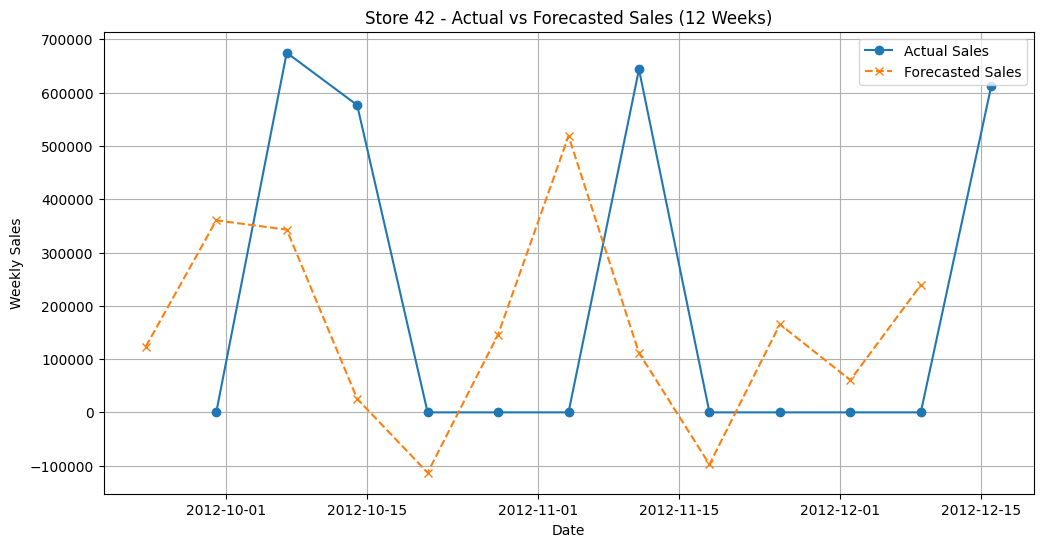

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Filter data for a specific store
store_id = 42
store_data_42 = df[df['Store'] == store_id]

# Set 'Date' as the index and resample weekly
store_data_42.set_index('Date', inplace=True)
store_data_42 = store_data_42['Weekly_Sales'].resample('W').sum()

# Split data into training and testing sets
train_data = store_data_42[:-12]  # Exclude the last 12 weeks for training
test_data = store_data_42[-12:]  # Use the last 12 weeks for testing

# Define and fit the SARIMAX model
model = SARIMAX(train_data,
                order=(2, 1, 2),  # Experiment with (p, d, q)
                seasonal_order=(2, 1, 1, 12),  # Adjust seasonal (P, D, Q, s)
                enforce_stationarity=False,
                enforce_invertibility=False)
model_fit = model.fit(disp=False)

# Forecast for the next 12 weeks
forecast_42 = model_fit.get_forecast(steps=12)
forecast_values_42 = forecast_42.predicted_mean
forecast_conf_int = forecast_42.conf_int()

# Generate dates for the forecasted period
forecast_dates = pd.date_range(start=train_data.index[-1], periods=12, freq='W')

# Combine forecast and confidence intervals into a DataFrame
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Forecast': forecast_values_42.values,
    'Lower Bound': forecast_conf_int.iloc[:, 0].values,
    'Upper Bound': forecast_conf_int.iloc[:, 1].values
})
forecast_df.set_index('Date', inplace=True)

# Print forecasted sales
print(f"Forecasted Sales for Store {store_id} for Next 12 Weeks:")
print(forecast_df)

# Calculate error metrics
mae = mean_absolute_error(test_data, forecast_values_42)
rmse = np.sqrt(mean_squared_error(test_data, forecast_values_42))


# Recalculate MAPE (avoid zero values)
epsilon = 1e-6
non_zero_actuals = test_data[test_data > epsilon]
aligned_forecast = forecast_values_42.loc[non_zero_actuals.index]
mape = np.mean(np.abs((non_zero_actuals - aligned_forecast) / non_zero_actuals)) * 10

# Print error metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Plot actual vs forecasted sales
plt.figure(figsize=(12, 6))
plt.plot(test_data, label='Actual Sales', marker='o')
plt.plot(forecast_dates, forecast_values_42, label='Forecasted Sales', linestyle='--', marker='x')
plt.title(f"Store {store_id} - Actual vs Forecasted Sales (12 Weeks)")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.grid(True)
plt.show()


# Step 8.Combine all above 5 plots prediction

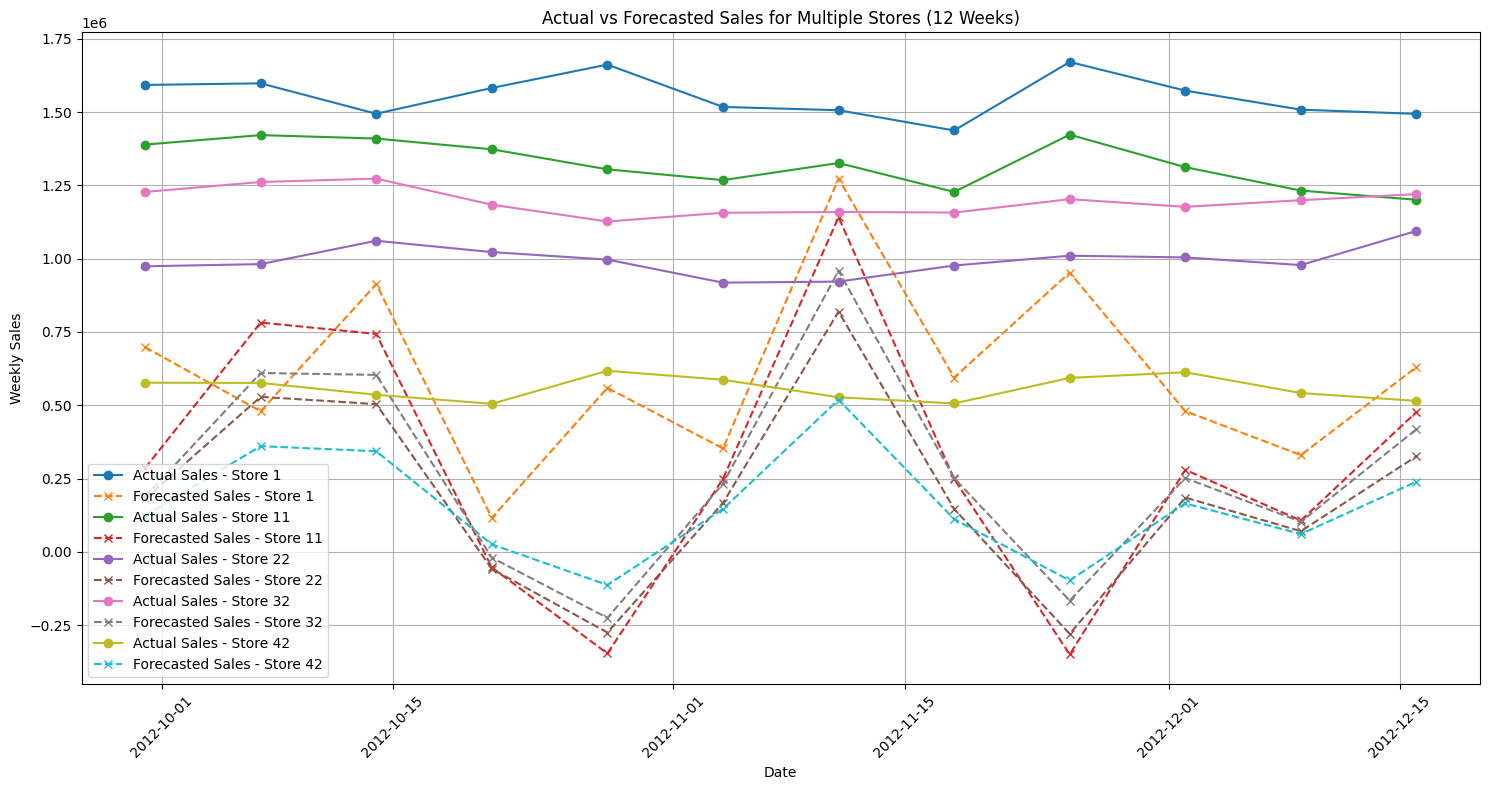

In [ ]:

# Get the actual sales data for the 5 stores
actual_sales = {
    1: df[df['Store'] == 1]['Weekly_Sales'].tail(12).values,  # Actual sales for Store 1
    11: df[df['Store'] == 11]['Weekly_Sales'].tail(12).values,  # Actual sales for Store 11
    22: df[df['Store'] == 22]['Weekly_Sales'].tail(12).values,  # Actual sales for Store 22
    32: df[df['Store'] == 32]['Weekly_Sales'].tail(12).values,  # Actual sales for Store 32
    42: df[df['Store'] == 42]['Weekly_Sales'].tail(12).values   # Actual sales for Store 42
}


# Assuming forecast_values and forecast_dates are from your previous SARIMAX model runs for each store
forecast_results = {
    1: forecast_values_1, # forecast for Store 1
    11: forecast_values_11, #  forecast for Store 11
    22: forecast_values_22, #  forecast for Store 22
    32: forecast_values_32, # forecast for Store 32
    42: forecast_values_42  # forecast for Store 42
}

# Define forecast dates (adjust according to your forecast start date)
forecast_dates = pd.date_range(start="2012-09-28", periods=12, freq='W')  # Adjust start date as needed

# Create a plot
plt.figure(figsize=(15, 8))

# Plot for each store with different linestyle and marker
for store_id in [1, 11, 22, 32, 42]:
    plt.plot(forecast_dates, actual_sales[store_id], label=f"Actual Sales - Store {store_id}", linestyle='-', marker='o')
    plt.plot(forecast_dates, forecast_results[store_id], label=f"Forecasted Sales - Store {store_id}", linestyle='--', marker='x')


# Customize the plot
plt.title("Actual vs Forecasted Sales for Multiple Stores (12 Weeks)")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend(loc='best')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()